In [2]:
# library
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib
matplotlib.use("Agg")

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# from sklearn import preprocessing
import glob
import time
from datetime import timedelta
from PIL import Image

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = True # make grid

import re
import os
import glob

from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm

In [3]:
divvy = glob.glob("data/*.csv")
for df in divvy:
    print(df)

data\202004-divvy-tripdata.csv
data\202005-divvy-tripdata.csv
data\202006-divvy-tripdata.csv
data\202007-divvy-tripdata.csv
data\202008-divvy-tripdata.csv
data\202009-divvy-tripdata.csv
data\202010-divvy-tripdata.csv
data\202011-divvy-tripdata.csv
data\202012-divvy-tripdata.csv
data\202101-divvy-tripdata.csv
data\202102-divvy-tripdata.csv
data\202103-divvy-tripdata.csv


In [4]:
df_list = []
for df in divvy:
    df_list.append(pd.read_csv(df))

df = pd.concat(df_list, axis=0, sort=True)
df.to_csv("data/divvy.csv", index=False)

In [7]:
divvy = pd.read_csv("./data/divvy.csv",sep=",")
# divvy.sort_values(by = 'started_at', ascending = True, inplace = True) 
divvy.head()

C:\Users\ykaid\AppData\Local\Temp\ipykernel_7904\1409022365.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  divvy = pd.read_csv("./data/divvy.csv",sep=",")


,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at
0,41.9322,-87.6586,152.0,Lincoln Ave & Diversey Pkwy,2020-04-26 18:12:03,member,A847FADBBC638E45,docked_bike,41.8964,-87.6610,86,Eckhart Park,2020-04-26 17:45:14
1,41.9306,-87.7238,499.0,Kosciuszko Park,2020-04-17 17:17:03,member,5405B80E996FF60D,docked_bike,41.9244,-87.7154,503,Drake Ave & Fullerton Ave,2020-04-17 17:08:54
2,41.8679,-87.6230,255.0,Indiana Ave & Roosevelt Rd,2020-04-01 18:08:36,member,5DD24A79A4E006F4,docked_bike,41.8945,-87.6179,142,McClurg Ct & Erie St,2020-04-01 17:54:13
3,41.8992,-87.6722,657.0,Wood St & Augusta Blvd,2020-04-07 13:02:31,member,2A59BBDF5CDBA725,docked_bike,41.9030,-87.6975,216,California Ave & Division St,2020-04-07 12:50:19
4,41.9695,-87.6547,323.0,Sheridan Rd & Lawrence Ave,2020-04-18 11:15:54,casual,27AD306C119C6158,docked_bike,41.8902,-87.6262,125,Rush St & Hubbard St,2020-04-18 10:22:59


In [8]:
def nmplot(df,min):
    tem_min = pd.read_csv(df,sep=",")
    tem_min["started_at"] = pd.to_datetime(tem_min["started_at"])    
    tem_min = tem_min.sort_values("started_at", ascending=True)
    start_timestamp = tem_min['started_at'].min()
    end_timestamp = tem_min["started_at"].max()

    interval = timedelta(minutes=min)
    current_timestamp = start_timestamp
    new_datasets = []

    timestamp = []
    gc = []
    edge_list = []
    node_list = []
    density = []

    while current_timestamp <= end_timestamp:
        # current timestamp plus interval
        next_timestamp = current_timestamp + interval

        # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
        subset = tem_min[(tem_min['started_at'] >= current_timestamp) & (tem_min['started_at'] < next_timestamp)]

        # Add to new dataset
        new_datasets.append(subset)
        timestamp.append(current_timestamp)

        # update timestamp
        current_timestamp = next_timestamp

    # analyze
    for i in range(len(new_datasets)):
        tem_day_n = nx.from_pandas_edgelist(new_datasets[i],
                                            source="start_station_id",
                                            target="end_station_id",
                                            create_using=nx.DiGraph())
        
        edge_list.append(tem_day_n.number_of_edges())
        node_list.append(tem_day_n.number_of_nodes())
        if len(node_list) - 1 != 0:
            density.append((2*len(edge_list))/(len(node_list)-1)) 
            
        current_timestamp += interval
        
    del timestamp[0:len(density)]
    plt.scatter(timestamp, density)
    plt.xlabel("N")
    plt.ylabel("M")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    plt.show()

In [9]:
# 同類度が時間経過でどのように変化するのかを計算するプログラム
def assrotativity(df,min):
    tem_min = pd.read_csv(df,sep=",")
    tem_min["started_at"] = pd.to_datetime(tem_min["started_at"])    
    tem_min = tem_min.sort_values("started_at", ascending=True)
    start_timestamp = tem_min['started_at'].min()
    end_timestamp = tem_min["started_at"].max()

    interval = timedelta(minutes=min)
    current_timestamp = start_timestamp
    new_datasets = []

    timestamp = []
    assrotativity = []

    while current_timestamp <= end_timestamp:
        # current timestamp plus interval
        next_timestamp = current_timestamp + interval

        # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
        subset = tem_min[(tem_min['started_at'] >= current_timestamp) & (tem_min['started_at'] < next_timestamp)]

        # Add to new dataset
        new_datasets.append(subset)
        timestamp.append(current_timestamp)

        # update timestamp
        current_timestamp = next_timestamp

    # analyze
    for i in range(len(new_datasets)):
        tem_day_n = nx.from_pandas_edgelist(new_datasets[i],
                                            source="start_station_id",
                                            target="end_station_id",
                                            create_using=nx.DiGraph())
        
        assrotativity.append(nx.degree_assortativity_coefficient(tem_day_n))
            
        current_timestamp += interval
        
    plt.scatter(timestamp, assrotativity)
    plt.xlabel("t")
    plt.ylabel("assrotativity")
    plt.grid()
    plt.show()
    

C:\Users\ykaid\AppData\Local\Temp\ipykernel_7904\1411048115.py:3: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tem_min = pd.read_csv(df,sep=",")
c:\Users\ykaid\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\Users\ykaid\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\Users\ykaid\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in sqrt
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


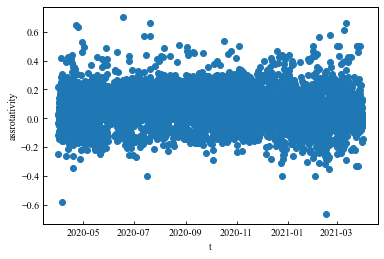

In [10]:
assrotativity("./data/divvy.csv", 60)

C:\Users\ykaid\AppData\Local\Temp\ipykernel_7904\1411048115.py:3: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tem_min = pd.read_csv(df,sep=",")
c:\Users\ykaid\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


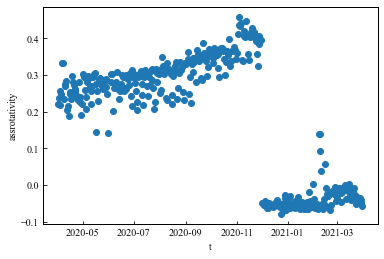

In [11]:
assrotativity("./data/divvy.csv", 1440)

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


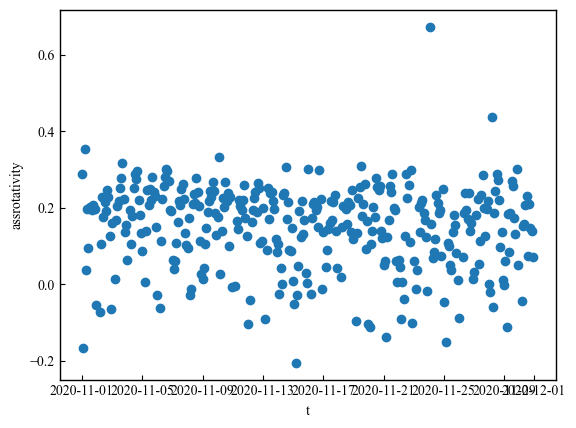

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


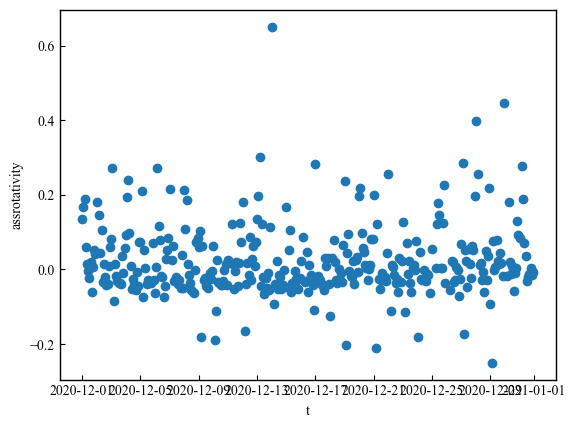

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


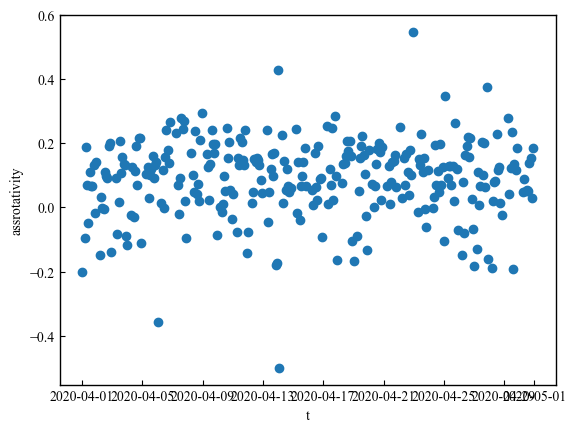

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


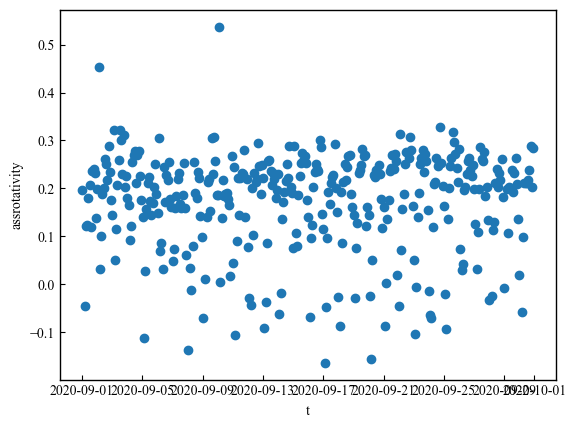

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


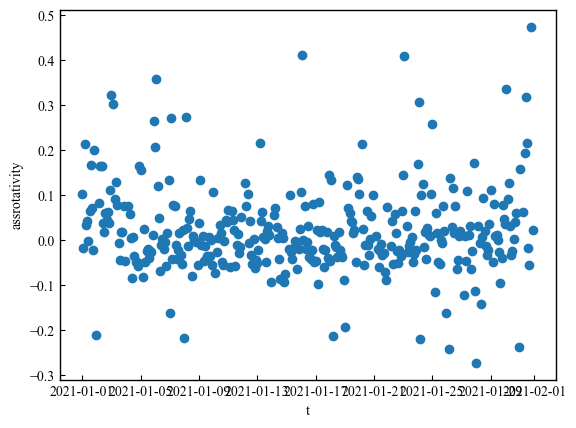

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


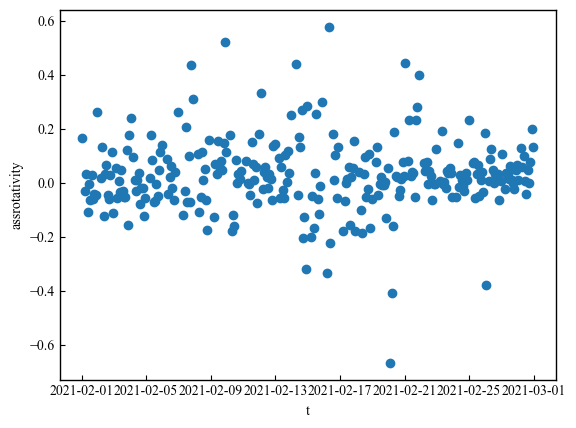

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


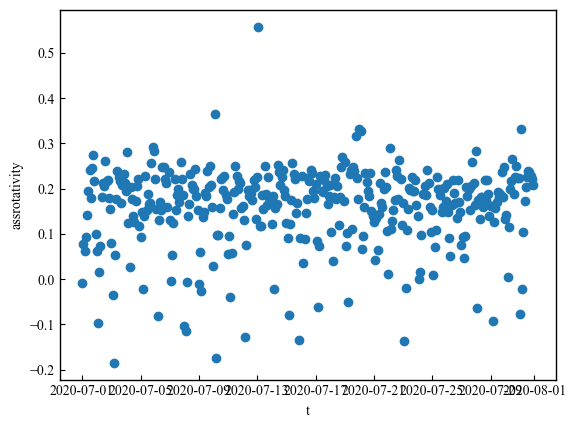

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


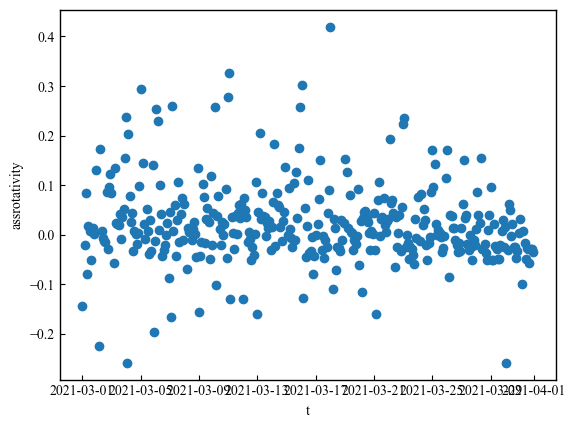

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


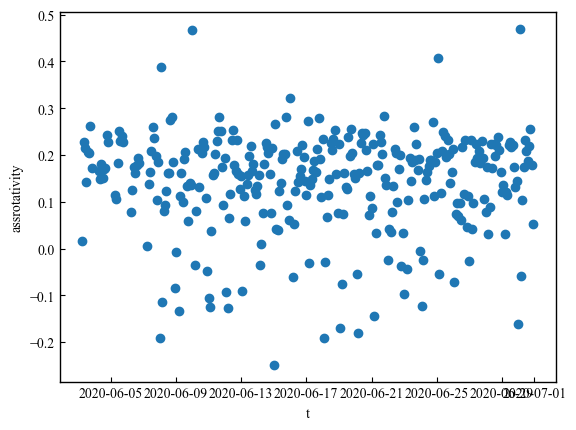

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


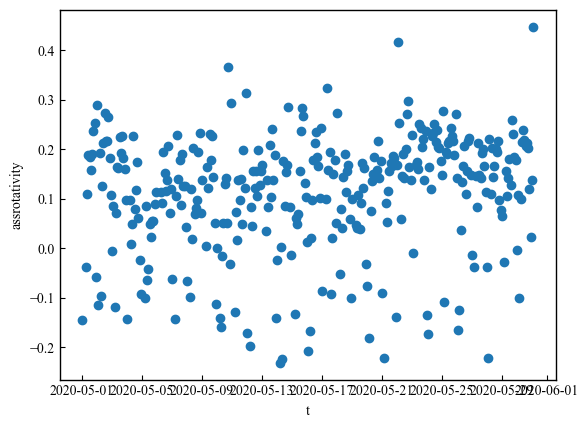

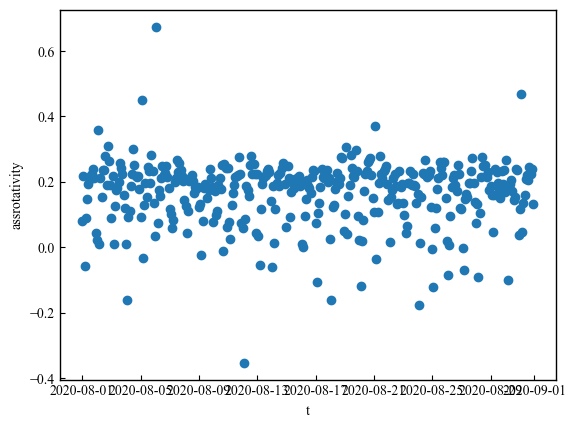

/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
/Users/ykaida/miniforge3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


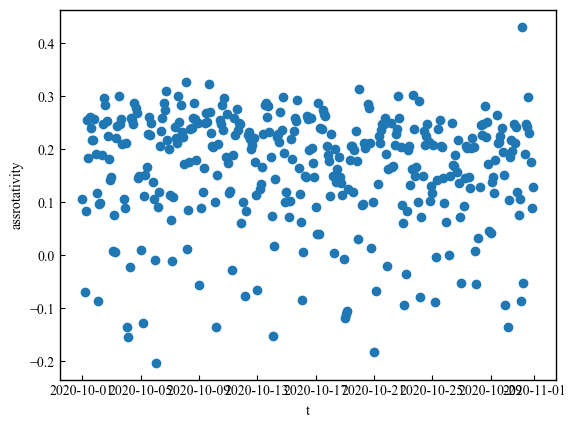

In [19]:
csvfile = glob.glob("./data/*.csv")
for i in range(len(csvfile)):
    assrotativity(csvfile[i], 120)

In [30]:
# node-edge plot
"""Node edge plot
X-axis Node
Y-axis Edge
fitting
"""
def nmplot_fit(df,min):
    tem_min = pd.read_csv(df,sep=",")
    tem_min["started_at"] = pd.to_datetime(tem_min["started_at"])    
    tem_min = tem_min.sort_values("started_at", ascending=True)
    start_timestamp = tem_min['started_at'].min()
    end_timestamp = tem_min["started_at"].max()

    interval = timedelta(minutes=min)
    current_timestamp = start_timestamp
    new_datasets = []

    timestamp = []
    gc = []
    edge_list = []
    node_list = []

    while current_timestamp <= end_timestamp:
        # current timestamp plus interval
        next_timestamp = current_timestamp + interval

        # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
        subset = tem_min[(tem_min['started_at'] >= current_timestamp) & (tem_min['started_at'] < next_timestamp)]

        # Add to new dataset
        new_datasets.append(subset)
        timestamp.append(current_timestamp)

        # update timestamp
        current_timestamp = next_timestamp

    # analyze
    for i in range(len(new_datasets)):
        tem_day_n = nx.from_pandas_edgelist(new_datasets[i],
                                            source="start_station_id",
                                            target="end_station_id",
                                            create_using=nx.DiGraph())
        
        edge_list.append(tem_day_n.number_of_edges())
        node_list.append(tem_day_n.number_of_nodes())
        

        current_timestamp += interval
    
    node_list = np.array(node_list)
    edge_list = np.array(edge_list)

    X = sm.add_constant(node_list)
    model = sm.OLS(edge_list, X)
    res = model.fit()
    
    intercept, slope = res.params
    plt.xlabel("N")
    plt.ylabel("M")
    #plt.xscale("log")
    #plt.yscale("log")
    plt.scatter(node_list, edge_list)
    plt.plot(node_list, intercept+slope*node_list, 'r', lw=4)
    plt.grid()
    plt.show()

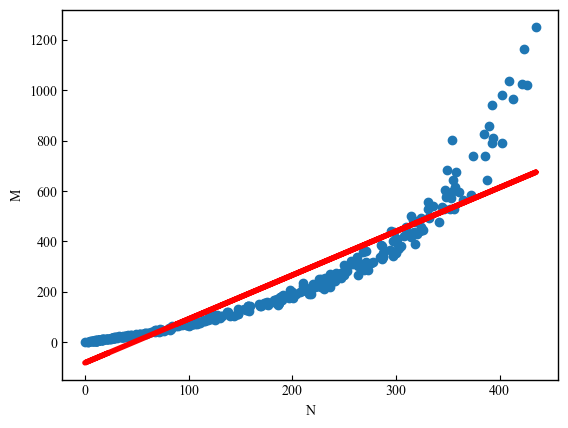

In [31]:
nmplot_fit('data/202004-divvy-tripdata.csv',120)

In [ ]:
# GC
def nmplot(df,min):
    tem_min = pd.read_csv(df,sep=",")
    tem_min["started_at"] = pd.to_datetime(tem_min["started_at"])    
    tem_min = tem_min.sort_values("started_at", ascending=True)
    start_timestamp = tem_min['started_at'].min()
    end_timestamp = tem_min["started_at"].max()

    interval = timedelta(minutes=min)
    current_timestamp = start_timestamp
    new_datasets = []

    timestamp = []
    gc = []
    edge_list = []
    node_list = []

    while current_timestamp <= end_timestamp:
        # current timestamp plus interval
        next_timestamp = current_timestamp + interval

        # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
        subset = tem_min[(tem_min['started_at'] >= current_timestamp) & (tem_min['started_at'] < next_timestamp)]

        # Add to new dataset
        new_datasets.append(subset)
        timestamp.append(current_timestamp)

        # update timestamp
        current_timestamp = next_timestamp

    # analyze
    for i in range(len(new_datasets)):
        tem_day_n = nx.from_pandas_edgelist(new_datasets[i],
                                            source="start_station_id",
                                            target="end_station_id",
                                            create_using=nx.DiGraph())
        
        gc.append(tem_day_n.number_of_nodes())
        

        current_timestamp += interval
    
    plt.plot(node_list, edge_list, marker="o")
    plt.xlabel("Timestamp")
    plt.ylabel("The size of GC")
    # plt.xscale("log")
    # plt.yscale("log")
    plt.grid()
    plt.show()